In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape,LeakyReLU, Dropout
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D,UpSampling2D
from tensorflow import keras

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Loading the images
ab = np.load('/content/drive/My Drive/Image_Color_CNN/ab1.npy', allow_pickle=True)
gray = np.load('/content/drive/My Drive/Image_Color_CNN/gray_scale.npy', allow_pickle=True)

In [5]:
def batch_prep(gray_img, batch_size=100):
  # CNN Inputs accept with dimensions: bath size, height, width and depth
  # Used 3 channels for RGB
    img = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        img[:batch_size, :, :, i] = gray_img[:batch_size]
    return img

In [6]:
img_in = batch_prep(gray, batch_size=300)

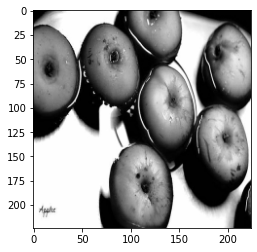

In [54]:
# Viewing the images

plt.imshow(gray[29], cmap=plt.cm.gray)

In [11]:
gray.shape

(25000, 224, 224)

In [12]:
img_in.shape

(300, 224, 224, 3)

In [35]:
# Creating Dataset consisting of both grayscaled and colored images

def get_rgb(gray_imgs, ab_imgs, n=10):
    img1 = np.zeros((n, 224, 224, 3))
    img1[:, :, :, 0] = gray_imgs[0:n]
    img1[:, :, :, 1:] = ab_imgs[0:n]

    #  Converting to Unit-8 format
    img1 = img1.astype(np.uint8)
    imgs = []

    for i in range(0, n):
        # convert images to color space RGB
        imgs.append(cv2.cvtColor(img1[i], cv2.COLOR_LAB2RGB))
    imgs = np.array(imgs)
    return imgs 

In [36]:
img_out = get_rgb(gray_imgs= gray, ab_imgs=ab, n=300)

In [47]:
model = Sequential()

# =============================
model.add(
    Conv2D(
        strides = 1,
        kernel_size = 3,
        filters = 12,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)

model.add(
    Conv2DTranspose(
        strides = 1,
        kernel_size = 3,
        filters = 12,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)

# Leaky Relu fixes dying relu
model.add(
    LeakyReLU(0.6)
)

# Dropout to preven overfitting
model.add(
    Dropout(0.4)
)


# =============================

model.add(
    Conv2D(
        strides = 1,
        kernel_size = 3,
        filters = 12,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)

model.add(
    Conv2DTranspose(
        strides = 1,
        kernel_size = 3,
        filters = 3,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)

# Leaky Relu fixes dying relu
model.add(
    LeakyReLU(0.6)
)

# Dropout to preven overfitting
model.add(
    Dropout(0.4)
)


# =============================

model.add(
    Conv2D(
        strides = 1,
        kernel_size = 3,
        filters = 12,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)

model.add(
    Conv2DTranspose(
        strides = 1,
        kernel_size = 3,
        filters = 3,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)

# Leaky Relu fixes dying relu
model.add(
    LeakyReLU(0.6)
)

# Dropout to preven overfitting
model.add(
    Dropout(0.4)
)


# =============================

model.add(
    Conv2D(
        strides = 1,
        kernel_size = 3,
        filters = 12,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)

model.add(
    Conv2DTranspose(
        strides = 1,
        kernel_size = 3,
        filters = 3,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)
 
model.add(
    AveragePooling2D(
        pool_size = (2, 2)
    )
)

# Doubles size of the input
model.add(
    UpSampling2D(
        size=(2,2)
    )
)


# Leaky Relu fixes dying relu
model.add(
    LeakyReLU(0.6)
)

# Dropout to preven overfitting
model.add(
    Dropout(0.4)
)


# =============================

model.add(
    Conv2D(
        strides = 1,
        kernel_size = 3,
        filters = 12,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)

model.add(
    Conv2DTranspose(
        strides = 1,
        kernel_size = 3,
        filters = 3,
        use_bias = True,
        bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05, maxval = 0.05),
        # no need padding because images are of same size
        padding = "valid",
        activation  = tf.nn.relu
    )
)

# Leaky Relu fixes dying relu
model.add(
    LeakyReLU(0.6)
)

# Dropout to preven overfitting
model.add(
    Dropout(0.4)
)

# =============================

In [48]:
# Compiling the mode;

model.compile(
    optimizer = tf.keras.optimizers.Adam(clipvalue = 0.5),
    # mean absolute percentage error 
    loss = "mape",
    metrics = tf.keras.metrics.Accuracy()
)

In [55]:
model.fit(img_in, img_out, epochs = 1000, batch_size = 16)

Epoch 1/1000
19/19 [==============================] - 1s 58ms/step - loss: 97.7471 - accuracy: 0.0681
Epoch 2/1000
19/19 [==============================] - 1s 55ms/step - loss: 95.5183 - accuracy: 0.0681
Epoch 3/1000
19/19 [==============================] - 1s 55ms/step - loss: 98.6804 - accuracy: 0.0681
Epoch 4/1000
19/19 [==============================] - 1s 56ms/step - loss: 98.5403 - accuracy: 0.0681
Epoch 5/1000
19/19 [==============================] - 1s 55ms/step - loss: 95.9518 - accuracy: 0.0681
Epoch 6/1000
19/19 [==============================] - 1s 56ms/step - loss: 97.5903 - accuracy: 0.0681
Epoch 7/1000
19/19 [==============================] - 1s 55ms/step - loss: 98.1191 - accuracy: 0.0681
Epoch 8/1000
19/19 [==============================] - 1s 56ms/step - loss: 96.7001 - accuracy: 0.0681
Epoch 9/1000
19/19 [==============================] - 1s 56ms/step - loss: 97.3378 - accuracy: 0.0681
Epoch 10/1000
19/19 [==============================] - 1s 56ms/step - loss: 96.093

KeyboardInterrupt: ignored

In [56]:
prediction = model.predict(img_in)

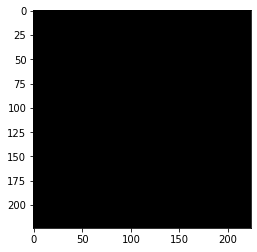

In [57]:
plt.imshow(prediction[29])

In [58]:
model.save("model.h5")

In [60]:
model_f = keras.models.load_model("/content/drive/My Drive/Image_Color_CNN/modelfinal.h5")

In [61]:
prediction2 = model_f.predict(img_in)

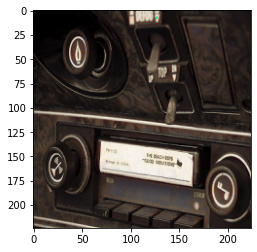

In [67]:
plt.imshow(prediction2[28].astype("uint8"))